# Curse of dimensionality exercises:

## Exercise 1

Suppose we have 50 points between 0 and 100 to be spread randomly. 

In [13]:
import pandas as pd
from matplotlib import pyplot as plt, patches
import random
import numpy as np
from mpl_toolkits import mplot3d

%matplotlib inline

### First try with one dimension

`1.`Generate and plot the 50 points within 5 intervals:  
- [0,20), 
- [20,40), 
- [40,60), 
- [60,80),
- [80,100)

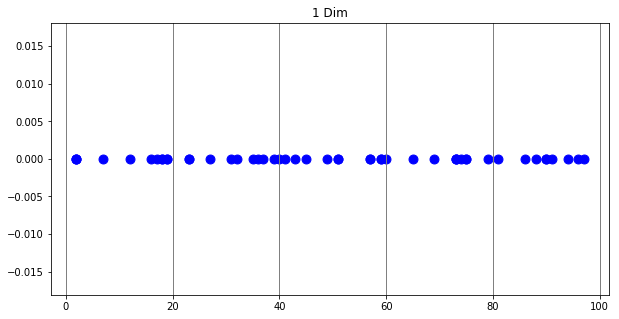

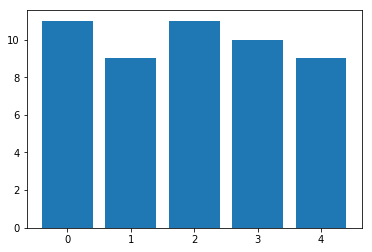

In [3]:
def random_generator(dim , num):
    points= np.random.randint(low=0,high=100,size=(num,dim))
    return points

points = random_generator(1,50)

plt.figure(figsize=(10,5))
plt.scatter(points, np.zeros_like(points), s=80, facecolors='b', edgecolors='b')
plt.grid(color='gray', linestyle='-', linewidth=1,axis='x')
plt.title("1 Dim")

plt.show()

unique, counts = np.unique(points//20, return_counts=True)
plt.bar(unique, counts)

plt.show()

## Now let's try with 2 dimensions

`2.`Assuming we have 5 intervals on the first dimension and 5 intervals on the 2nd dimension, generate 50 points within these intervals and plot them.

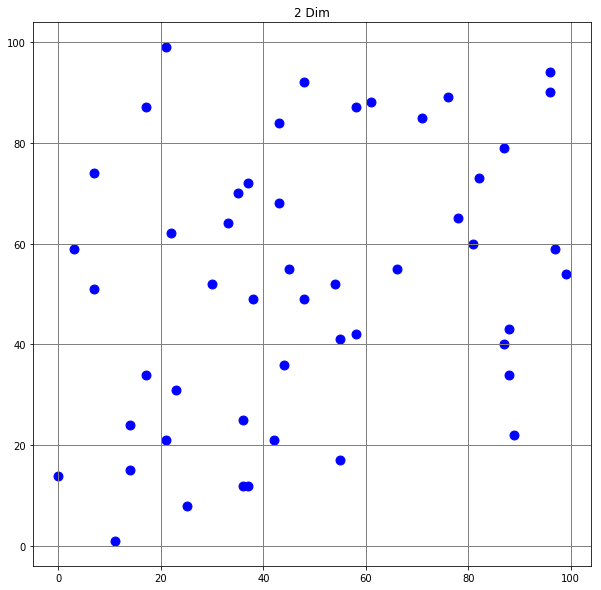

<BarContainer object of 23 artists>

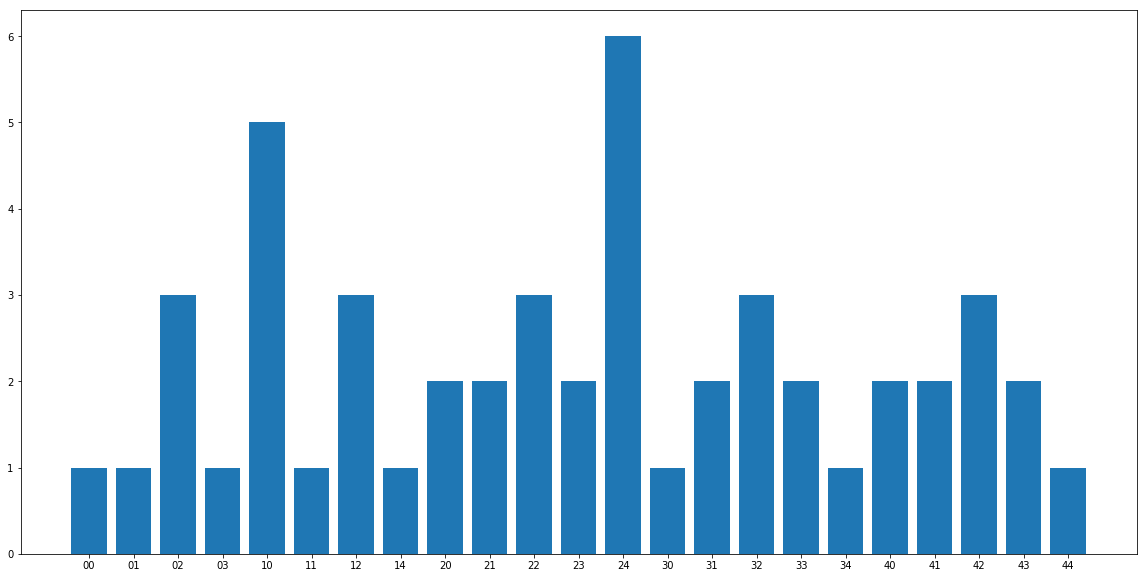

In [4]:
points = random_generator(2,50)
x_tmp, y_tmp = list(zip(*points))

plt.figure(figsize=(10,10))
plt.scatter(x_tmp, y_tmp, s=80, facecolors='b', edgecolors='b')
plt.grid(color='gray', linestyle='-', linewidth=1, axis='both')
plt.title("2 Dim")

plt.show()

points= np.random.randint(low=0,high=100,size=(50,2))
bin = list(map(lambda point: f'{point[0]//20}{point[1]//20}', points))
unique, counts = np.unique(bin, return_counts=True)
plt.figure(figsize=(20,10))

plt.bar(unique, counts)

## Now in 3D Case

`3.`Now suppose we have 5 intervals on the third dimension.With this condition, generate 50 points within them and plot the points in a 3d manner.

Calculate the average number of points in each cell (both theoretically and practically), then discuss your answers.

**Answer:**



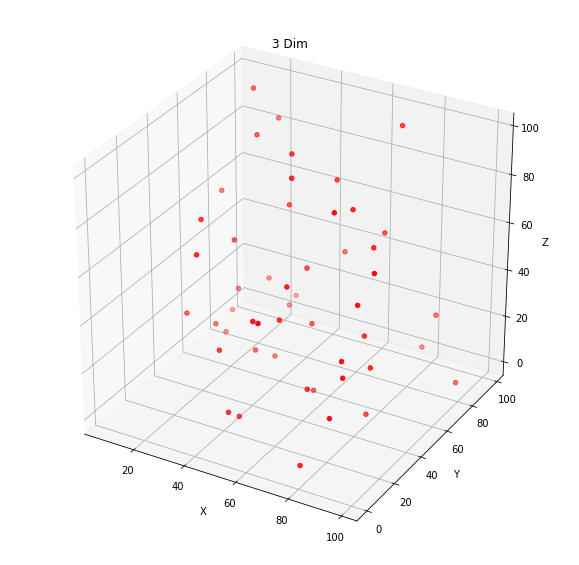

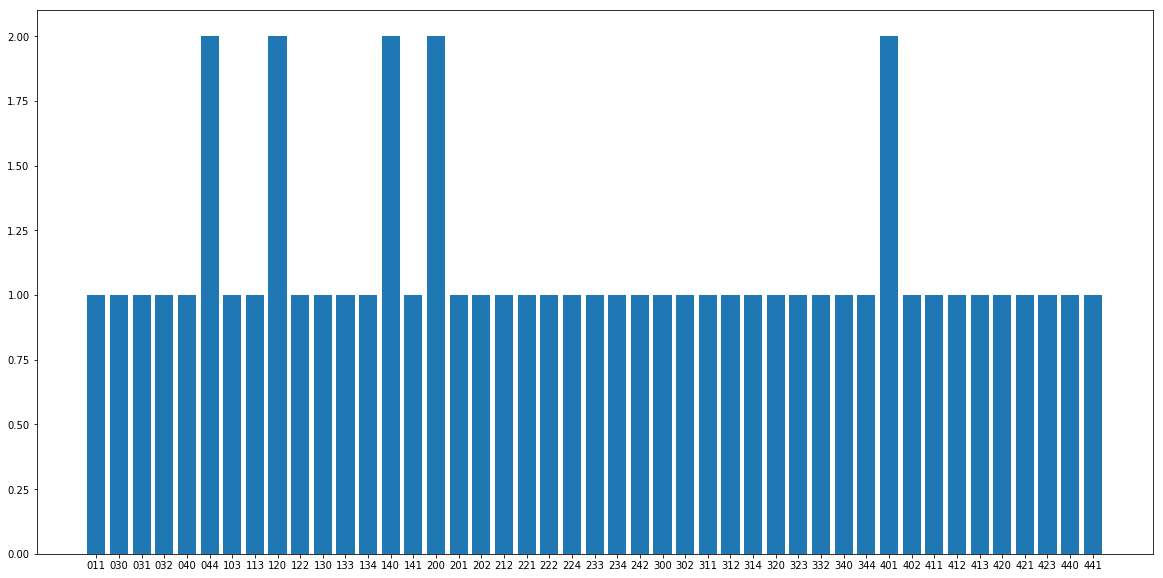

In [5]:
points = random_generator(3,50)
x_tmp, y_tmp, z_tmp = list(zip(*points))

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_tmp, y_tmp, z_tmp, c='r', marker='o')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title("3 Dim")

plt.show()

bin = list(map(lambda point: f'{point[0]//20}{point[1]//20}{point[2]//20}', points))
unique, counts = np.unique(bin, return_counts=True)
plt.figure(figsize=(20,10))
plt.bar(unique, counts)

plt.show()

## Exercise 2



`1.`Suppose there is a circle inside a squere. Imagine we've standard scaled our data, so they're centered on zero. This means that the center of our circle is now zero. Try to plot this circle inside a squere. Note that the ratio of your circle is 1.

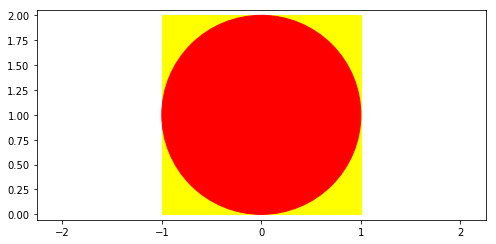

In [11]:
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
fig = plt.figure()
ax = fig.add_subplot(111)
rect = patches.Rectangle((-1, 0), 2, 2, color='yellow')
circle = patches.Circle((0, 1), radius=1, color='red')
ax.add_patch(rect)
ax.add_patch(circle)
plt.xlim([-10, 10])
plt.ylim([-10, 10])
plt.axis('equal')
plt.show()

`2.`Calculate what fraction of the volume of the square is outside the circle.Do the same for the cube outside the sphere, etc (Try to plot the situation and answer the question).

**Bonus :** Try to answer for higher dimensions(4 and more). Draw some random points from a 0-1 distribution, then measure how far away from the origin they are. Also, calculate what percentage of n-cube in inside the n-ball (for n>3). Can you analyze these results?

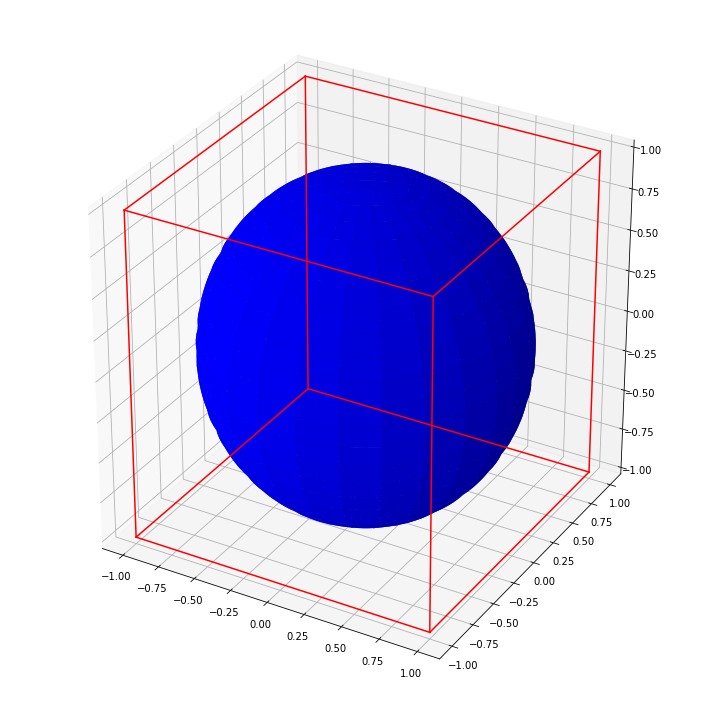

In [36]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from itertools import product, combinations


fig = plt.figure(figsize = (10,10))
ax = fig.gca(projection='3d')
ax.set_aspect("equal")

# draw cube
r = [-1, 1]
for s, e in combinations(np.array(list(product(r, r, r))), 2):
    if np.sum(np.abs(s-e)) == r[1]-r[0]:
        ax.plot3D(*zip(s, e), color="r")

# draw sphere


# ax = fig.add_subplot(111, projection='3d')

u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)

x = np.outer(np.cos(u), np.sin(v))
y = np.outer(np.sin(u), np.sin(v))
z = np.outer(np.ones(np.size(u)), np.cos(v))
ax.plot_surface(x, y, z, rstride=4, cstride=4, color='b')


plt.show()

**Answer:**


In [40]:
# for 2D
rectangle = 2*2
cycle = np.pi * 1**2
print("in 2D we have : ", cycle/rectangle)

#for 3D
cube = 2*2*2
sphere = 4/3 * np.pi * 1**3
print("in 3D we have : ", sphere/cube)

in 2D we have :  0.7853981633974483
in 3D we have :  0.5235987755982988


## Exercise 3

`1.`Generate 50 points randomly with a uniform distribution in the range of 0 to 100 for one, three, ten and one hundred dimensions, then calculate the average distance of 5 nearest neighbors (5-NN) for 10 random points in each dimension.
Discuss your answer.

**Answer :**

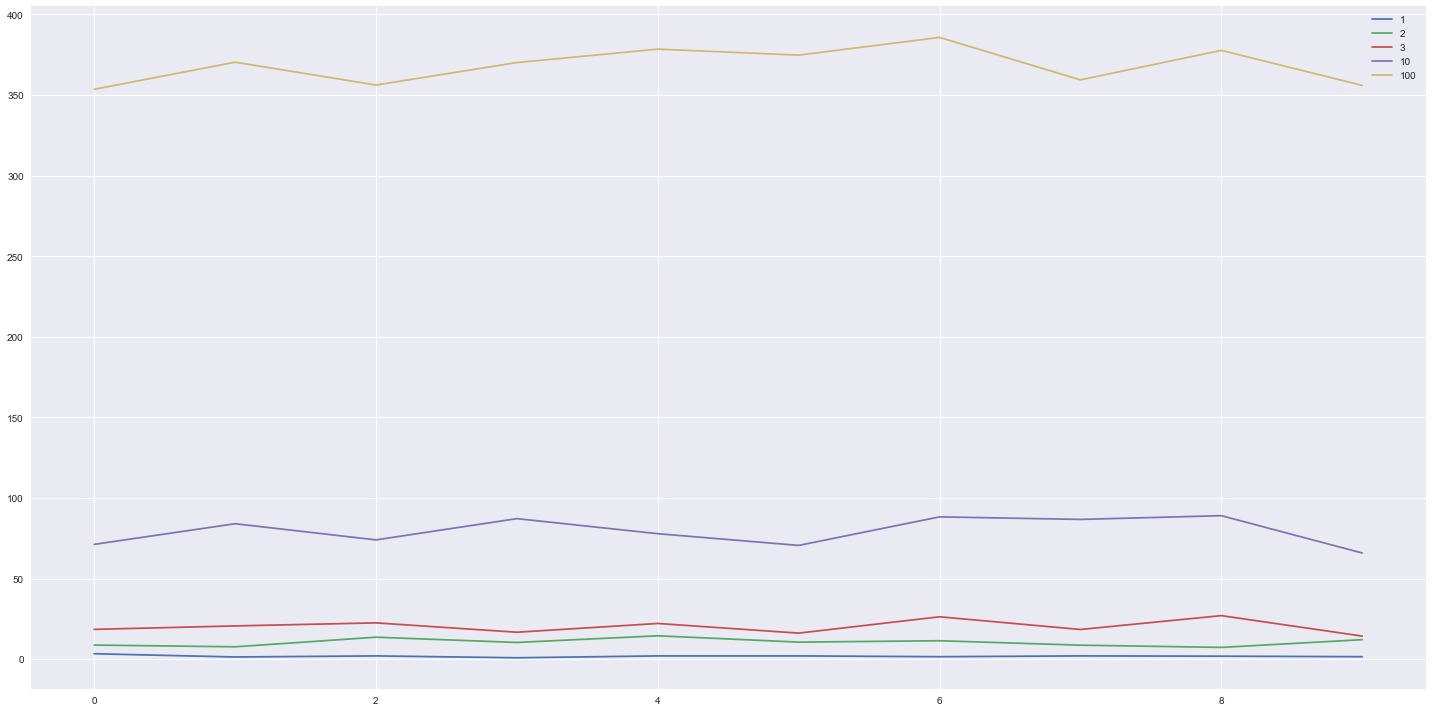

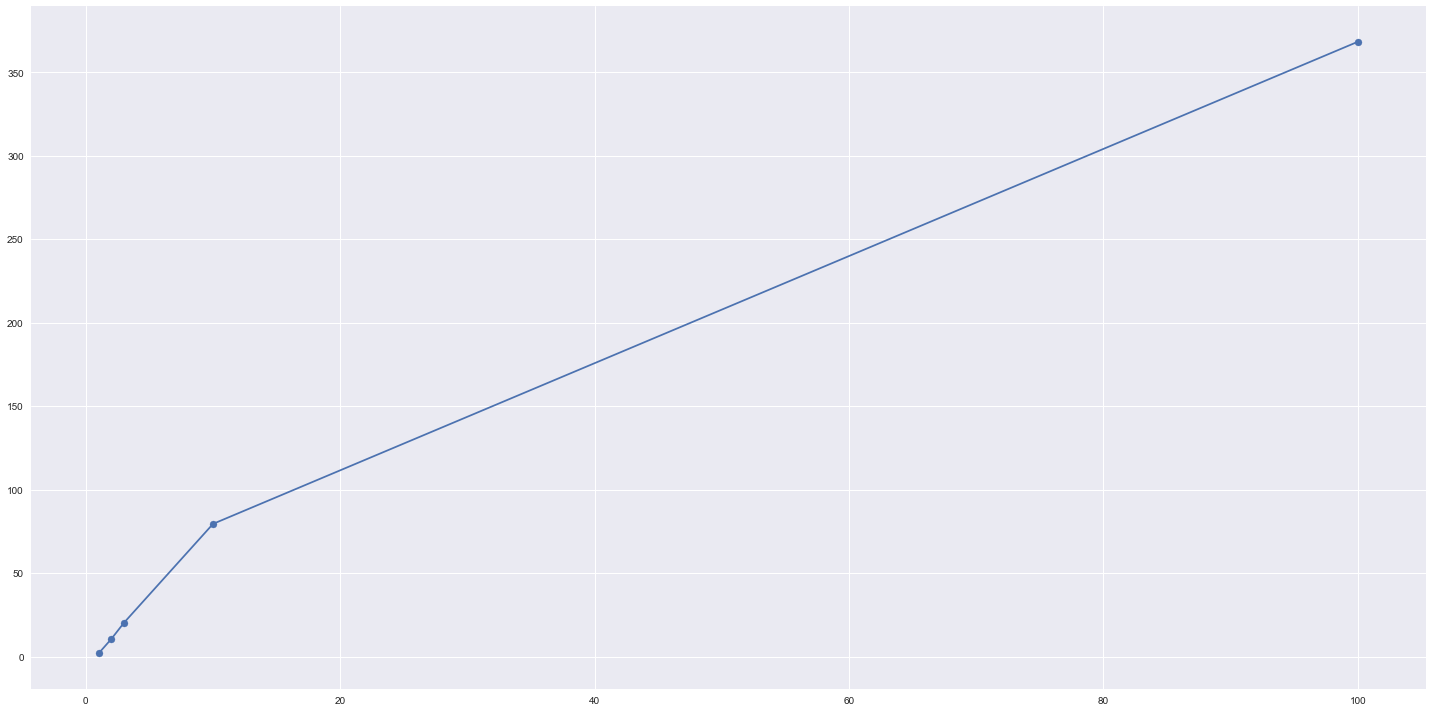

In [41]:
import numpy as np
import random, math
import matplotlib.pyplot as plt

def random_generator(dim , num):
    points= np.random.randint(low=0,high=100,size=(num,dim))
    return points

def mean(x):
    mean = np.mean(x)
    return mean


def distance(a, b):
    dist = np.linalg.norm(a-b)
    return dist


def knn(points, num_samples, K):
    mean_avg = []
    for num in num_samples:
        distance_list = []

        for p in points:
            dis = distance(p,num)
            distance_list.append(dis)

        distance_list.sort()
        tmp_res = mean(distance_list[:K])
        mean_avg.append(tmp_res)

    return mean_avg

def plot(dims , avg_dist):
    plt.figure(figsize=(20,10))

    for d,avr in zip(dims,avg_dist):
        plt.plot(avr,label=str(d))
        
    plt.legend()
    plt.show()

def plot2(dims , avg_dist):
    avg_dist = list(map(lambda x: mean(x),avg_dist))

    plt.figure(figsize=(20,10))

    plt.plot(dims,avg_dist)
    plt.scatter(dims,avg_dist)

    label = list(map(lambda x:str(x),dims))
    plt.show()


dims = [1, 2, 3, 10, 100]
avg_dist = []
plt.style.use("seaborn")
for d in dims:
    points = random_generator(dim=d,num=100)
    num_samples = random_generator(dim=d,num=10)
    res = knn(points=points, num_samples=num_samples, K=6)
    avg_dist.append(res)

plot(dims,avg_dist)
plot2(dims,avg_dist)